# Nauplius Chlorophyll-A (Chla) Concentration Time-Series Analysis

Info: Chlorophyll-a is a pigment found in all photosynthetic organisms, including phytoplankton. The column unit is milligrams per cubic metre which gives the chlorophyll-a concentration weight in mg present in a 1m^3 volume of water.

Insight: The concentration of chlorophyll-a in seawater is often used as a proxy for phytoplankton biomass, which can in turn indicate the overall health of the plankton community.

In [1]:
import pandas as pd

#### Reading & Cleaning datasets

In [6]:
# Creating a dictionary for all geo-points with their chlorophyll data by nasa & occci
geopoint = {'A': {'chla_nasa': pd.read_csv('../Nauplius data (raw)/point A/dataCHLA_NASAcombo.csv'),
                  'chla_occci': pd.read_csv('../Nauplius data (raw)/point A/dataCHLA_OCCCI-v50.csv')},
            'B': {'chla_nasa': pd.read_csv('../Nauplius data (raw)/point B/dataCHLA_NASAcombo.csv'),
                  'chla_occci': pd.read_csv('../Nauplius data (raw)/point B/dataCHLA_OCCCI-v50.csv')},
            'C': {'chla_nasa': pd.read_csv('../Nauplius data (raw)/point C/dataCHLA_NASAcombo.csv'),
                  'chla_occci': pd.read_csv('../Nauplius data (raw)/point C/dataCHLA_OCCCI-v50.csv')}}
# Cleaning all datasets
for point in geopoint:
    # Accessing dataframes
    df_nasa = geopoint[point]['chla_nasa']
    df_occci = geopoint[point]['chla_occci']
    # Dropping empty unnamed NaN col
    df_nasa.drop(columns=df_nasa.columns[-1], inplace=True)
    df_occci.drop(columns=df_occci.columns[-1], inplace=True)
    # Renaming the chlorophyll concentration col
    df_nasa.rename(columns={'CHLA= NASA-combo satellite Chlorophyll (mg/m3)': 'NASA Chl-a (mg/m3)'}, inplace=True)
    df_occci.rename(columns={'CHLA= OCCCI-v5.0 satellite Chlorophyll (mg/m3)': 'OCCCI Chl-a (mg/m3)'}, inplace=True)

# Display 2 random datasets
display(geopoint['B']['chla_occci'], geopoint['C']['chla_nasa'])

,DATE-YMD,OCCCI Chl-a (mg/m3)
0,1998-01-15,2.883
1,1998-02-15,3.364
2,1998-03-15,3.661
3,1998-04-15,3.277
4,1998-05-15,4.423
...,...,...
275,2021-08-15,4.012
276,2021-09-15,3.569
277,2021-10-15,2.779
278,2021-11-15,3.016


,DATE-YMD,NASA Chl-a (mg/m3)
0,1998-01-15,3.407
1,1998-02-15,3.320
2,1998-03-15,4.021
3,1998-04-15,3.796
4,1998-05-15,3.388
...,...,...
266,2021-08-15,3.299
267,2021-09-15,13.081
268,2021-10-15,8.040
269,2021-11-15,6.031


#### Comparison of all datasets: 1 graph per geopoint (A,B,C) and 2 lineplots per graph (NASA, OCCCI)

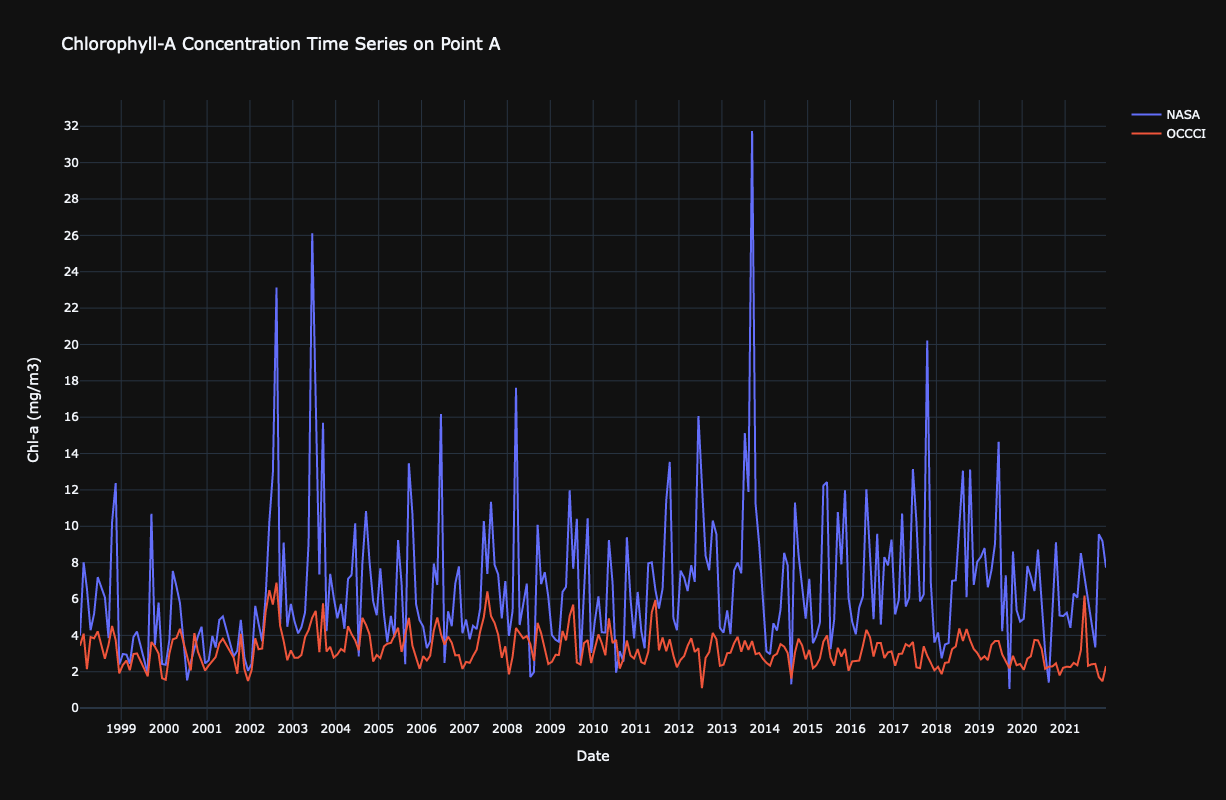

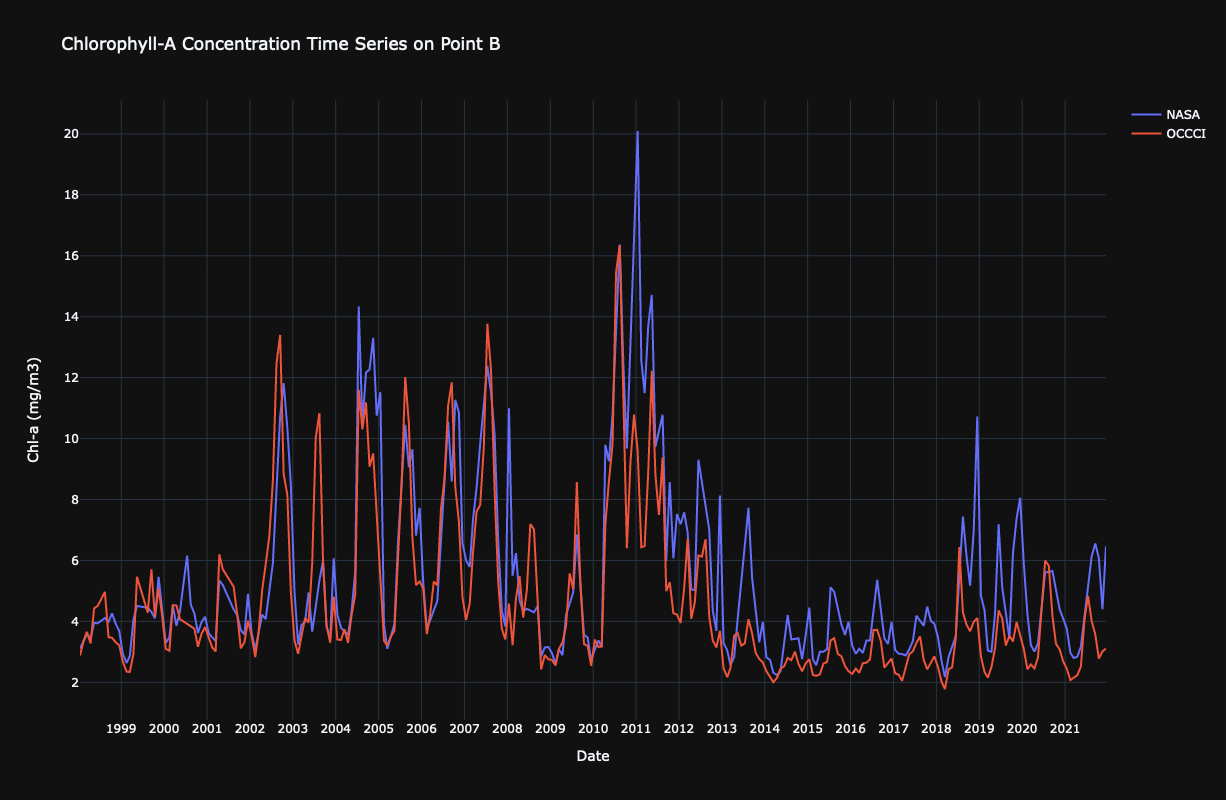

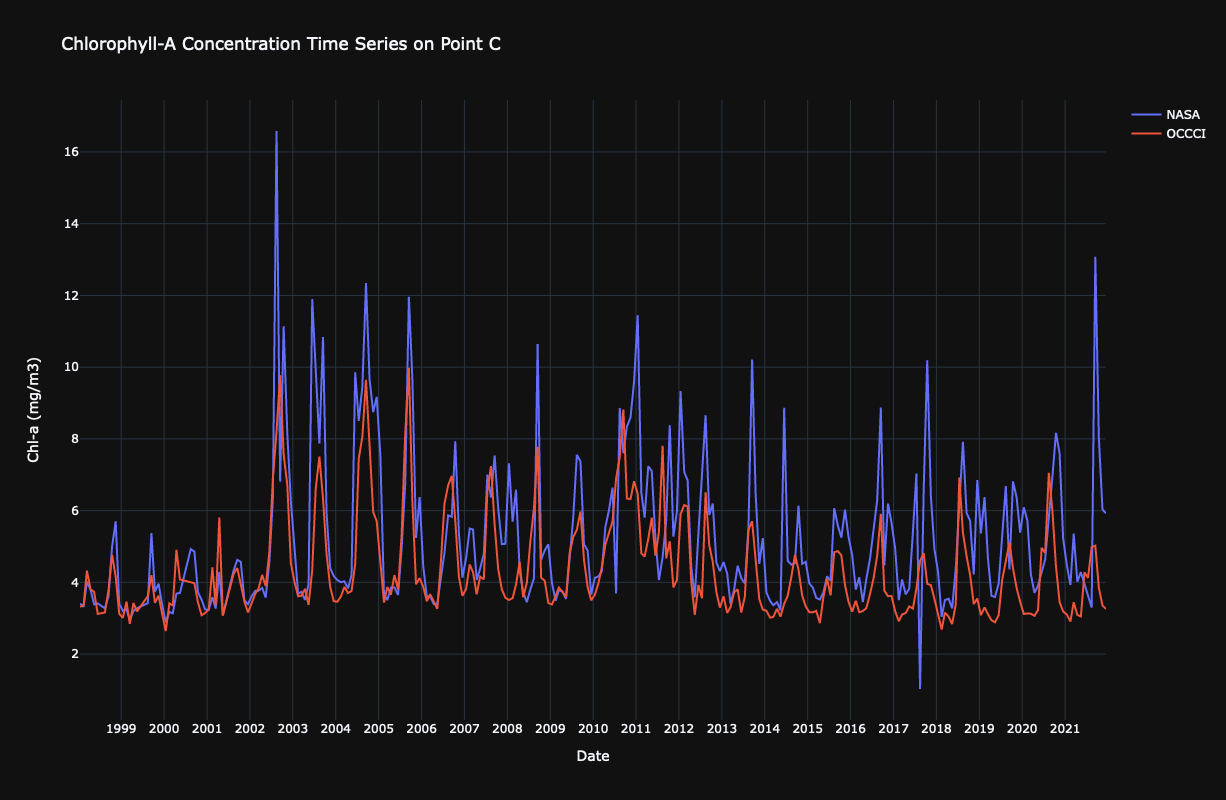

In [9]:
import plotly.graph_objs as go

# Loop through each geopoint
for point in geopoint:
    df_nasa = geopoint[point]['chla_nasa']
    df_occci = geopoint[point]['chla_occci']
    # create traces for each dataset
    trace1 = go.Scatter(x=df_nasa['DATE-YMD'], y=df_nasa['NASA Chl-a (mg/m3)'], mode='lines', name='NASA')
    trace2 = go.Scatter(x=df_occci['DATE-YMD'], y=df_occci['OCCCI Chl-a (mg/m3)'], mode='lines', name='OCCCI')
    # create layout for the plot
    layout = go.Layout(title=f'Chlorophyll-A Concentration Time Series on Point {point}',
                       xaxis=dict(title='Date', dtick='M12'),
                       yaxis=dict(title='Chl-a (mg/m3)', dtick=2),
                       height = 800, width=1200,
                       template='plotly_dark')
    # create figure object and plot the traces
    fig = go.Figure(data=[trace1, trace2], layout=layout)
    fig.show()